# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.

### First, download the data from: https://www.kaggle.com/datasets/ealaxi/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?
### Note: don't use the entire dataset, use a sample instead, with n=100000 elements, so your computer doesn't freeze.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("/Users/adimalik/Documents/Iron Hack/Labs/Week7/5. lab-imbalance/PS_20174392719_1491204439457_log.csv").sample(n=100000)

In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5936980,404,CASH_OUT,35790.78,C1226240221,0.00,0.00,C1964035205,516193.74,551984.52,0,0
4123288,302,CASH_OUT,609541.92,C1644785463,473.00,0.00,C621251092,0.00,609541.92,0,0
4846104,347,PAYMENT,22147.16,C517919818,0.00,0.00,M1473069232,0.00,0.00,0,0
3564188,260,CASH_IN,48905.47,C1699478190,8651048.55,8699954.02,C40242265,129297.61,80392.14,0,0
218302,13,CASH_OUT,92246.48,C1803033296,112684.00,20437.52,C732929122,6206722.57,6298969.05,0,0


### What is the distribution of the outcome? 

<Axes: xlabel='isFraud'>

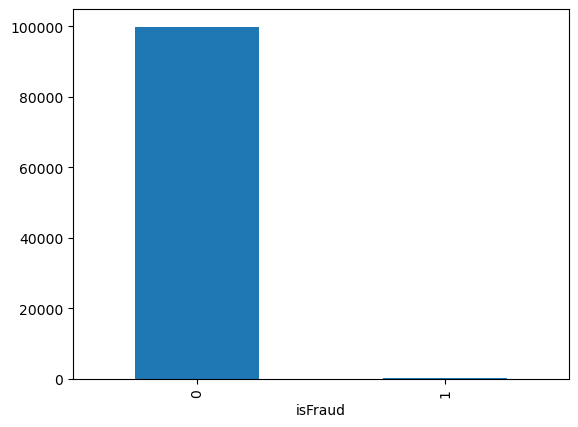

In [6]:
count_classes = pd.value_counts(df["isFraud"])
count_classes.plot(kind="bar")

In [7]:
# Or

In [8]:
count_classes = df["isFraud"].value_counts(normalize = True)*100
count_classes

isFraud
0    99.859
1     0.141
Name: proportion, dtype: float64

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [9]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### Run a logisitc regression classifier and evaluate its accuracy.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [11]:
# Encode categorical variables

label_encoder = LabelEncoder()
df['type_encoded'] = label_encoder.fit_transform(df['type'])

In [12]:
# Split the dataset into features (X) and target variable (y)

X = df.drop(columns=['isFraud', 'type', 'nameOrig', 'nameDest'])
y = df['isFraud']

In [13]:
# Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Train a logistic regression model

model = LogisticRegression()
model.fit(X_train, y_train)

/Users/adimalik/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
# Make predictions on the testing set

y_pred = model.predict(X_test)

In [16]:
# Evaluate the accuracy of the model

accuracy = accuracy_score(y_test, y_pred)

In [17]:
print("Accuracy of Logistic Regression Classifier:", accuracy)

Accuracy of Logistic Regression Classifier: 0.9998


### Now pick a model of your choice and evaluate its accuracy.

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
# Train a Random Forest Classifier

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
# Make predictions on the testing set

rf_y_pred = rf_model.predict(X_test)

In [21]:
# Evaluate the accuracy of the Random Forest Classifier

rf_accuracy = accuracy_score(y_test, rf_y_pred)

In [22]:
print("Accuracy of Random Forest Classifier:", rf_accuracy)

Accuracy of Random Forest Classifier: 0.99965


### Which model worked better and how do you know?

In [26]:
"""Based on the provided accuracy scores:

Logistic Regression Classifier: Accuracy = 0.9998
Random Forest Classifier: Accuracy = 0.99965
Both models achieved extremely high accuracy scores, indicating that they perform very well on the given dataset. 
However, the Logistic Regression Classifier achieved a slightly higher accuracy score compared to the Random Forest 
Classifier.

To determine which model worked better, we should consider factors beyond just accuracy, such as model complexity, 
interpretability, and computational efficiency.

Logistic Regression is a simpler model compared to Random Forest, which could make it more interpretable and easier 
to explain.

Random Forest is an ensemble learning method that generally performs well on a wide range of datasets, but it might 
be computationally expensive and less interpretable compared to Logistic Regression.
Therefore, in this scenario, while both models achieved high accuracy, the Logistic Regression Classifier might be 
preferred due to its simplicity and interpretability unless there are specific requirements that favor the Random 
Forest Classifier's strengths, such as handling non-linear relationships or interactions in the data"""

"Based on the provided accuracy scores:\n\nLogistic Regression Classifier: Accuracy = 0.9998\nRandom Forest Classifier: Accuracy = 0.99965\nBoth models achieved extremely high accuracy scores, indicating that they perform very well on the given dataset. \nHowever, the Logistic Regression Classifier achieved a slightly higher accuracy score compared to the Random Forest \nClassifier.\n\nTo determine which model worked better, we should consider factors beyond just accuracy, such as model complexity, \ninterpretability, and computational efficiency.\n\nLogistic Regression is a simpler model compared to Random Forest, which could make it more interpretable and easier \nto explain.\n\nRandom Forest is an ensemble learning method that generally performs well on a wide range of datasets, but it might \nbe computationally expensive and less interpretable compared to Logistic Regression.\nTherefore, in this scenario, while both models achieved high accuracy, the Logistic Regression Classifier 

### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.